## Data cleaning and Regression to predict car prices

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')

In [2]:
import os

os.chdir("/home/leon/Documents/projects")

In [4]:
data = pd.read_csv("USA_cars_datasets.csv")

In [5]:
data.head()

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    2499 non-null   int64  
 1   price         2499 non-null   int64  
 2   brand         2499 non-null   object 
 3   model         2499 non-null   object 
 4   year          2499 non-null   int64  
 5   title_status  2499 non-null   object 
 6   mileage       2499 non-null   float64
 7   color         2499 non-null   object 
 8   vin           2499 non-null   object 
 9   lot           2499 non-null   int64  
 10  state         2499 non-null   object 
 11  country       2499 non-null   object 
 12  condition     2499 non-null   object 
dtypes: float64(1), int64(4), object(8)
memory usage: 253.9+ KB


Look at variable distribution

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,2499.0,1.249000e+03,721.543484,0.0,624.5,1249.0,1873.5,2498.0
price,2499.0,1.876767e+04,12116.094936,0.0,10200.0,16900.0,25555.5,84900.0
year,2499.0,2.016714e+03,3.442656,1973.0,2016.0,2018.0,2019.0,2020.0
mileage,2499.0,5.229869e+04,59705.516356,0.0,21466.5,35365.0,63472.5,1017936.0
lot,2499.0,1.676914e+08,203877.210516,159348797.0,167625331.0,167745058.0,167779772.0,167805500.0


Check for missing values

In [8]:
data.isna().sum()/len(data)*100

Unnamed: 0      0.0
price           0.0
brand           0.0
model           0.0
year            0.0
title_status    0.0
mileage         0.0
color           0.0
vin             0.0
lot             0.0
state           0.0
country         0.0
condition       0.0
dtype: float64

In [9]:
data.drop("Unnamed: 0", axis=1, inplace=True)

In [10]:
data.head()

,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


## Let's check which car brand is most common in the dataset

In [13]:
per_brand = data.groupby('brand').count().sort_values('model', ascending = False).reset_index()[['brand', 'model']].head(10)
per_brand

,brand,model
0,ford,1235
1,dodge,432
2,nissan,312
3,chevrolet,297
4,gmc,42
5,jeep,30
6,chrysler,18
7,bmw,17
8,hyundai,15
9,buick,13


Text(0.5, 1.0, 'Most represented Car brands in the dataset')

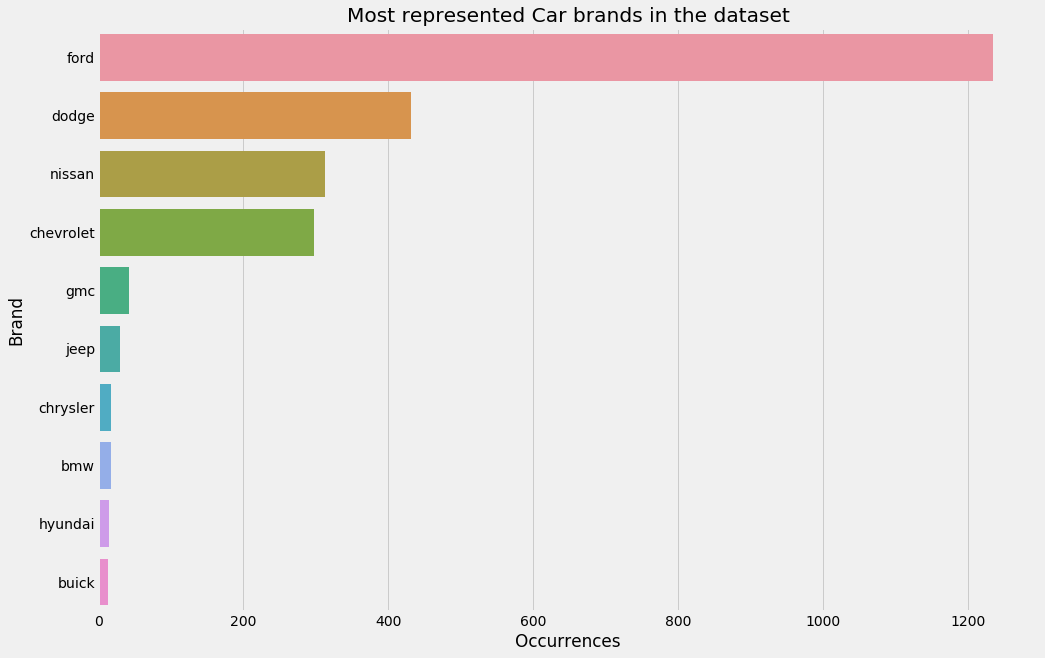

In [16]:
plt.figure(figsize=(15,10))

sns.barplot(data = per_brand, x = 'model', y = 'brand')
plt.ylabel("Brand")
plt.xlabel("Occurrences")
plt.title("Most represented Car brands in the dataset")

In [17]:
#data['condition'].value_counts()/len(data)*100

## Price

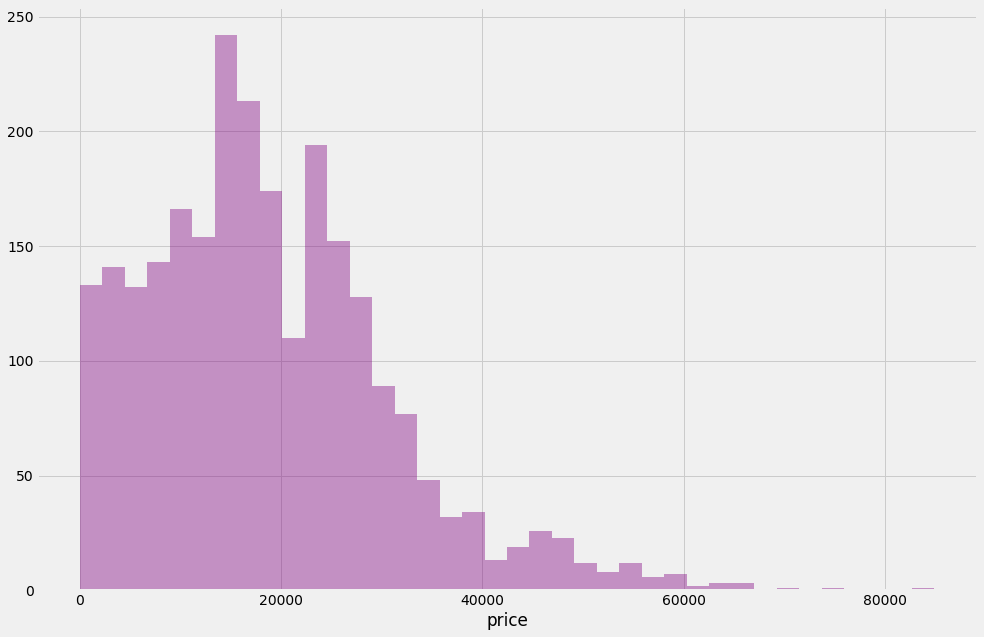

In [18]:
plt.figure(figsize=(15,10))

sns.distplot(data['price'], kde = False, color = 'purple')

__We can see a positive skew of our dependent variable.__

In [21]:
len(data)

2499

In [20]:
len(data[data['price'] < 35000])

2278

__Leaving out cars with prices above 35K only reduces the data by ~300 data points.__

In [23]:
data = data[data['price'] < 35000]

## Mileage

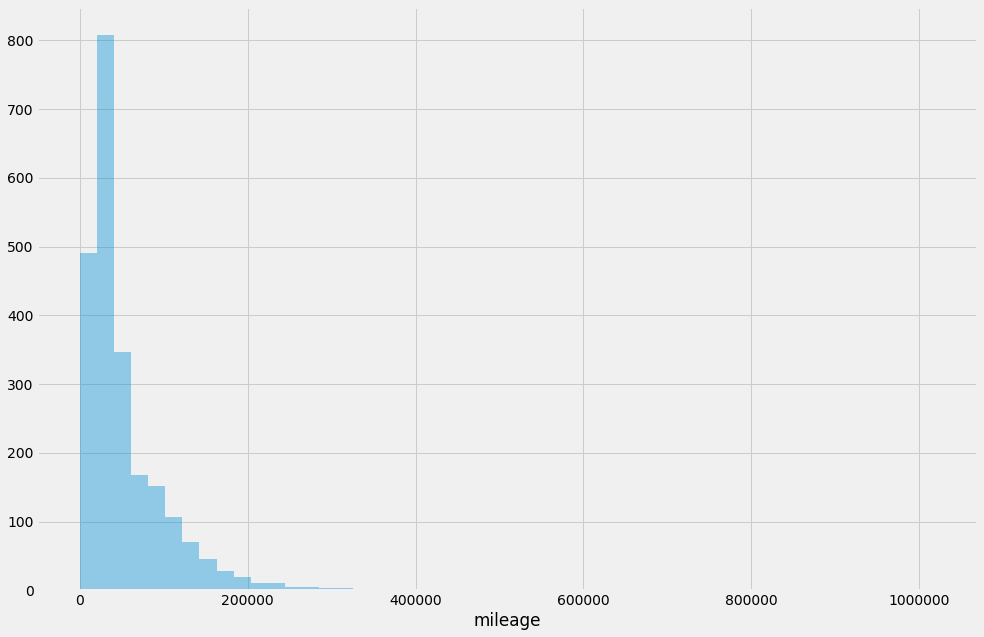

In [24]:
plt.figure(figsize=(15,10))

sns.distplot(data['mileage'], kde = False)

In [25]:
data[data['mileage'] == data['mileage'].max()] # more than 1 mio miles

,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
528,1025,peterbilt,truck,2010,salvage insurance,1017936.0,color:,1xp7d49x0ad793710,167529842,georgia,usa,17 hours left


In [27]:
print(len(data))
print("\n")
print(len(data[data['mileage'] <= 200000]))

data = data[data['mileage'] <= 200000]

2231


2231


__Only regarding cars with a mileage of less than 200k miles reduces our data only by 47 datapoints.__

In [28]:
data.head()

,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left
5,5700,dodge,mpv,2018,clean vehicle,45561.0,white,2c4rdgeg9jr237989,167655771,texas,usa,2 days left


## Salvage

In [29]:
data['title_status'].value_counts()

clean vehicle        2100
salvage insurance     131
Name: title_status, dtype: int64

__Drop salvage cars and other variables not important for the analysis__

__lot, state and country can of course have an influence on price but  for the current models i decided not to regard those variables__

In [30]:
data = data[data['title_status'] == 'clean vehicle']
data.drop(['title_status', 'color', 'vin', 'lot', 'state', 'country'], axis=1, inplace=True)

In [31]:
data.columns

Index(['price', 'brand', 'model', 'year', 'mileage', 'condition'], dtype='object')

## Year

In [32]:
data['year'].value_counts()

2019    769
2018    360
2017    338
2016    177
2015    174
2014     90
2013     62
2012     47
2020     38
2011     19
2010      4
2008      4
2009      4
2006      3
2003      3
2007      2
2001      2
2004      1
1973      1
2005      1
2002      1
Name: year, dtype: int64

In [33]:
# only regard the years with a lot of observations

data = data[(data['year'] == 2019) | (data['year'] == 2018) | (data['year'] == 2017) | (data['year'] == 2016) | (data['year'] == 2015)]   

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1818 entries, 2 to 2498
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   price      1818 non-null   int64  
 1   brand      1818 non-null   object 
 2   model      1818 non-null   object 
 3   year       1818 non-null   int64  
 4   mileage    1818 non-null   float64
 5   condition  1818 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 99.4+ KB


In [36]:
data.columns

Index(['price', 'brand', 'model', 'year', 'mileage', 'condition'], dtype='object')

## Dummy variables

__Encode categorcial values as dummies.__

In [37]:
data = pd.concat([data,pd.get_dummies(data['brand'],prefix="brand")],axis=1)
data.drop('brand', axis=1, inplace=True)

data = pd.concat([data,pd.get_dummies(data['model'],prefix="model")],axis=1)
data.drop('model', axis=1, inplace=True)

data = pd.concat([data,pd.get_dummies(data['year'],prefix="year")],axis=1)
data.drop('year', axis=1, inplace=True)

data = pd.concat([data,pd.get_dummies(data['condition'],prefix="condition")],axis=1)
data.drop('condition', axis=1, inplace=True)

In [38]:
from scipy.stats import zscore

__Standardize mileage variable__

In [39]:
data['mileage'] = zscore(data['mileage'])

In [40]:
data.shape

(1818, 167)

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X = data.drop('price', axis = 1).values
y = data['price'].values

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping

# Build the neural network
model = Sequential()
model.add(Dense(25, input_dim=X.shape[1], activation='relu')) # Hidden 1
model.add(Dense(10, activation='relu')) # Hidden 2
model.add(Dense(1)) # Output


model.compile(loss='mean_squared_error', optimizer='adam')

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, 
                        patience=5, verbose=1, mode='auto', 
                        restore_best_weights=True)


history = model.fit(X_train,y_train,validation_data=(X_test,y_test),
          callbacks=[monitor],verbose=2,epochs=1000)



Epoch 1/1000
35/35 - 0s - loss: 391197280.0000 - val_loss: 402508352.0000
Epoch 2/1000
35/35 - 0s - loss: 391182592.0000 - val_loss: 402487104.0000
Epoch 3/1000
35/35 - 0s - loss: 391150368.0000 - val_loss: 402437280.0000
Epoch 4/1000
35/35 - 0s - loss: 391078880.0000 - val_loss: 402332960.0000
Epoch 5/1000
35/35 - 0s - loss: 390938560.0000 - val_loss: 402142880.0000
Epoch 6/1000
35/35 - 0s - loss: 390695456.0000 - val_loss: 401828800.0000
Epoch 7/1000
35/35 - 0s - loss: 390313568.0000 - val_loss: 401353888.0000
Epoch 8/1000
35/35 - 0s - loss: 389752416.0000 - val_loss: 400681248.0000
Epoch 9/1000
35/35 - 0s - loss: 388984928.0000 - val_loss: 399779584.0000
Epoch 10/1000
35/35 - 0s - loss: 387961056.0000 - val_loss: 398597568.0000
Epoch 11/1000
35/35 - 0s - loss: 386662656.0000 - val_loss: 397123616.0000
Epoch 12/1000
35/35 - 0s - loss: 385055456.0000 - val_loss: 395340032.0000
Epoch 13/1000
35/35 - 0s - loss: 383118272.0000 - val_loss: 393185216.0000
Epoch 14/1000
35/35 - 0s - loss: 3

Epoch 112/1000
35/35 - 0s - loss: 36547852.0000 - val_loss: 41458268.0000
Epoch 113/1000
35/35 - 0s - loss: 36386272.0000 - val_loss: 41299016.0000
Epoch 114/1000
35/35 - 0s - loss: 36209068.0000 - val_loss: 41146420.0000
Epoch 115/1000
35/35 - 0s - loss: 36036632.0000 - val_loss: 40979464.0000
Epoch 116/1000
35/35 - 0s - loss: 35876216.0000 - val_loss: 40823924.0000
Epoch 117/1000
35/35 - 0s - loss: 35686328.0000 - val_loss: 40657544.0000
Epoch 118/1000
35/35 - 0s - loss: 35534120.0000 - val_loss: 40497376.0000
Epoch 119/1000
35/35 - 0s - loss: 35372528.0000 - val_loss: 40343352.0000
Epoch 120/1000
35/35 - 0s - loss: 35194896.0000 - val_loss: 40190508.0000
Epoch 121/1000
35/35 - 0s - loss: 35041248.0000 - val_loss: 40044104.0000
Epoch 122/1000
35/35 - 0s - loss: 34876520.0000 - val_loss: 39891332.0000
Epoch 123/1000
35/35 - 0s - loss: 34717516.0000 - val_loss: 39735548.0000
Epoch 124/1000
35/35 - 0s - loss: 34561448.0000 - val_loss: 39589724.0000
Epoch 125/1000
35/35 - 0s - loss: 3440

Epoch 223/1000
35/35 - 0s - loss: 25056300.0000 - val_loss: 30740706.0000
Epoch 224/1000
35/35 - 0s - loss: 25004604.0000 - val_loss: 30680952.0000
Epoch 225/1000
35/35 - 0s - loss: 24945698.0000 - val_loss: 30625328.0000
Epoch 226/1000
35/35 - 0s - loss: 24893690.0000 - val_loss: 30566054.0000
Epoch 227/1000
35/35 - 0s - loss: 24840202.0000 - val_loss: 30521774.0000
Epoch 228/1000
35/35 - 0s - loss: 24789384.0000 - val_loss: 30462020.0000
Epoch 229/1000
35/35 - 0s - loss: 24727288.0000 - val_loss: 30402544.0000
Epoch 230/1000
35/35 - 0s - loss: 24675800.0000 - val_loss: 30356584.0000
Epoch 231/1000
35/35 - 0s - loss: 24629722.0000 - val_loss: 30316994.0000
Epoch 232/1000
35/35 - 0s - loss: 24577636.0000 - val_loss: 30263684.0000
Epoch 233/1000
35/35 - 0s - loss: 24543448.0000 - val_loss: 30249114.0000
Epoch 234/1000
35/35 - 0s - loss: 24476006.0000 - val_loss: 30192162.0000
Epoch 235/1000
35/35 - 0s - loss: 24425662.0000 - val_loss: 30122744.0000
Epoch 236/1000
35/35 - 0s - loss: 2436

Epoch 334/1000
35/35 - 0s - loss: 21104374.0000 - val_loss: 26965848.0000
Epoch 335/1000
35/35 - 0s - loss: 21078250.0000 - val_loss: 26925224.0000
Epoch 336/1000
35/35 - 0s - loss: 21060264.0000 - val_loss: 26899282.0000
Epoch 337/1000
35/35 - 0s - loss: 21042424.0000 - val_loss: 26882576.0000
Epoch 338/1000
35/35 - 0s - loss: 21020326.0000 - val_loss: 26864500.0000
Epoch 339/1000
35/35 - 0s - loss: 20993590.0000 - val_loss: 26844526.0000
Epoch 340/1000
35/35 - 0s - loss: 20975364.0000 - val_loss: 26815612.0000
Epoch 341/1000
35/35 - 0s - loss: 20954776.0000 - val_loss: 26773982.0000
Epoch 342/1000
35/35 - 0s - loss: 20934334.0000 - val_loss: 26754184.0000
Epoch 343/1000
35/35 - 0s - loss: 20907860.0000 - val_loss: 26744376.0000
Epoch 344/1000
35/35 - 0s - loss: 20885676.0000 - val_loss: 26714106.0000
Epoch 345/1000
35/35 - 0s - loss: 20865160.0000 - val_loss: 26703068.0000
Epoch 346/1000
35/35 - 0s - loss: 20844214.0000 - val_loss: 26692036.0000
Epoch 347/1000
35/35 - 0s - loss: 2082

Epoch 445/1000
35/35 - 0s - loss: 19361856.0000 - val_loss: 25233048.0000
Epoch 446/1000
35/35 - 0s - loss: 19349912.0000 - val_loss: 25215122.0000
Epoch 447/1000
35/35 - 0s - loss: 19343056.0000 - val_loss: 25211798.0000
Epoch 448/1000
35/35 - 0s - loss: 19350014.0000 - val_loss: 25191188.0000
Epoch 449/1000
35/35 - 0s - loss: 19321264.0000 - val_loss: 25181380.0000
Epoch 450/1000
35/35 - 0s - loss: 19324384.0000 - val_loss: 25216470.0000
Epoch 451/1000
35/35 - 0s - loss: 19305650.0000 - val_loss: 25196130.0000
Epoch 452/1000
35/35 - 0s - loss: 19290132.0000 - val_loss: 25170590.0000
Epoch 453/1000
35/35 - 0s - loss: 19277306.0000 - val_loss: 25167102.0000
Epoch 454/1000
35/35 - 0s - loss: 19271588.0000 - val_loss: 25163256.0000
Epoch 455/1000
35/35 - 0s - loss: 19258736.0000 - val_loss: 25147456.0000
Epoch 456/1000
35/35 - 0s - loss: 19246096.0000 - val_loss: 25126284.0000
Epoch 457/1000
35/35 - 0s - loss: 19238294.0000 - val_loss: 25119244.0000
Epoch 458/1000
35/35 - 0s - loss: 1922

Epoch 556/1000
35/35 - 0s - loss: 18455188.0000 - val_loss: 24302978.0000
Epoch 557/1000
35/35 - 0s - loss: 18426454.0000 - val_loss: 24290428.0000
Epoch 558/1000
35/35 - 0s - loss: 18419234.0000 - val_loss: 24273212.0000
Epoch 559/1000
35/35 - 0s - loss: 18408934.0000 - val_loss: 24266916.0000
Epoch 560/1000
35/35 - 0s - loss: 18403894.0000 - val_loss: 24270324.0000
Epoch 561/1000
35/35 - 0s - loss: 18403282.0000 - val_loss: 24254872.0000
Epoch 562/1000
35/35 - 0s - loss: 18396782.0000 - val_loss: 24248810.0000
Epoch 563/1000
35/35 - 0s - loss: 18395108.0000 - val_loss: 24251380.0000
Epoch 564/1000
35/35 - 0s - loss: 18384584.0000 - val_loss: 24233768.0000
Epoch 565/1000
35/35 - 0s - loss: 18382356.0000 - val_loss: 24217364.0000
Epoch 566/1000
35/35 - 0s - loss: 18373570.0000 - val_loss: 24220352.0000
Epoch 567/1000
35/35 - 0s - loss: 18364006.0000 - val_loss: 24232980.0000
Epoch 568/1000
35/35 - 0s - loss: 18361390.0000 - val_loss: 24222160.0000
Epoch 569/1000
35/35 - 0s - loss: 1835

__Check for overfitting (not expected as early stopping is implemented)__

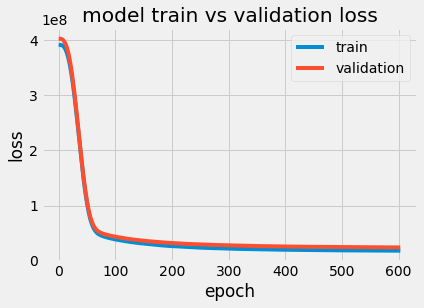

In [45]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()



In [46]:
from sklearn import metrics

# Predict
pred = model.predict(X_test)

# Measure MSE error.  
score = metrics.mean_squared_error(pred,y_test)
print("Final score (MSE): {}".format(score))

Final score (MSE): 24087261.27579154


In [47]:
# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(pred,y_test))
print("Final score (RMSE): {}".format(score))

Final score (RMSE): 4907.877471554433


Plot Lift curve

In [48]:
# Regression chart.
def chart_regression(pred, y, sort=True):
    t = pd.DataFrame({'pred': pred, 'y': y.flatten()})
    if sort:
        t.sort_values(by=['y'], inplace=True)
    plt.plot(t['y'].tolist(), label='expected')
    plt.plot(t['pred'].tolist(), label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()



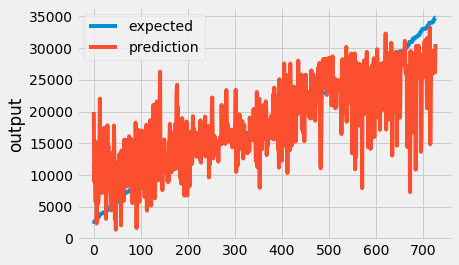

In [49]:
chart_regression(pred.flatten(),y_test)

The RMSE is 4900 Dollars. On average, the predicted value is off by this amount.